In [2]:
from google.colab import files

uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
required_columns = ['price','bedrooms','bathrooms','area']
data = data[required_columns]
data.head()

,price,bedrooms,bathrooms,area
0,13300000,4,2,7420
1,12250000,4,4,8960
2,12250000,3,2,9960
3,12215000,4,2,7500
4,11410000,4,1,7420


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   bedrooms   545 non-null    int64
 2   bathrooms  545 non-null    int64
 3   area       545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB


In [8]:
#Drop Null values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   bedrooms   545 non-null    int64
 2   bathrooms  545 non-null    int64
 3   area       545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB


In [9]:
column_names = {'price' : 'Price','bedrooms':'No_of_Bedrooms',
                'bathrooms':'No_of_Bathrooms','area':'Flat_Area'}
data = data.rename(columns = column_names)
data.columns

Index(['Price', 'No_of_Bedrooms', 'No_of_Bathrooms', 'Flat_Area'], dtype='object')

In [11]:
#Treating Sale Price outlier values
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
IQR = q3 - q1
lowerlimit = q1 - 1.5*IQR
upperlimit = q3 + 1.5*IQR
lowerlimit,upperlimit

(-35000.0, 9205000.0)

In [19]:
def limit_imputer(value):
    if value>upperlimit:
        return upperlimit
    if value<lowerlimit:
        return lowerlimit
    else:
        return value

data['Price'] = data['Price'].apply(limit_imputer)
data.head()

,Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area,mean_sale_price
0,9205000.0,4,2,7420,4.727388e+06
1,9205000.0,4,4,8960,4.727388e+06
2,9205000.0,3,2,9960,4.727388e+06
3,9205000.0,4,2,7500,4.727388e+06
4,9205000.0,4,1,7420,4.727388e+06


In [13]:
data['mean_sale_price'] = data['Price'].mean()
data['mean_sale_price']

0      4.727388e+06
1      4.727388e+06
2      4.727388e+06
3      4.727388e+06
4      4.727388e+06
           ...     
540    4.727388e+06
541    4.727388e+06
542    4.727388e+06
543    4.727388e+06
544    4.727388e+06
Name: mean_sale_price, Length: 545, dtype: float64

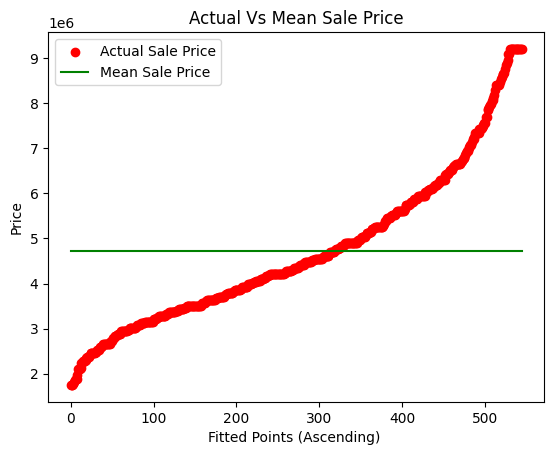

In [14]:
plt.figure(dpi = 100)
k = range(0,len(data))
plt.scatter(k,data["Price"].sort_values(),color = 'red',label = "Actual Sale Price")
plt.plot(k,data['mean_sale_price'],color="green",label = "Mean Sale Price")
plt.xlabel("Fitted Points (Ascending) ")
plt.ylabel("Price")
plt.title("Actual Vs Mean Sale Price")
plt.legend()

In [15]:
mean_sales_difference = data['mean_sale_price'] - data['Price']

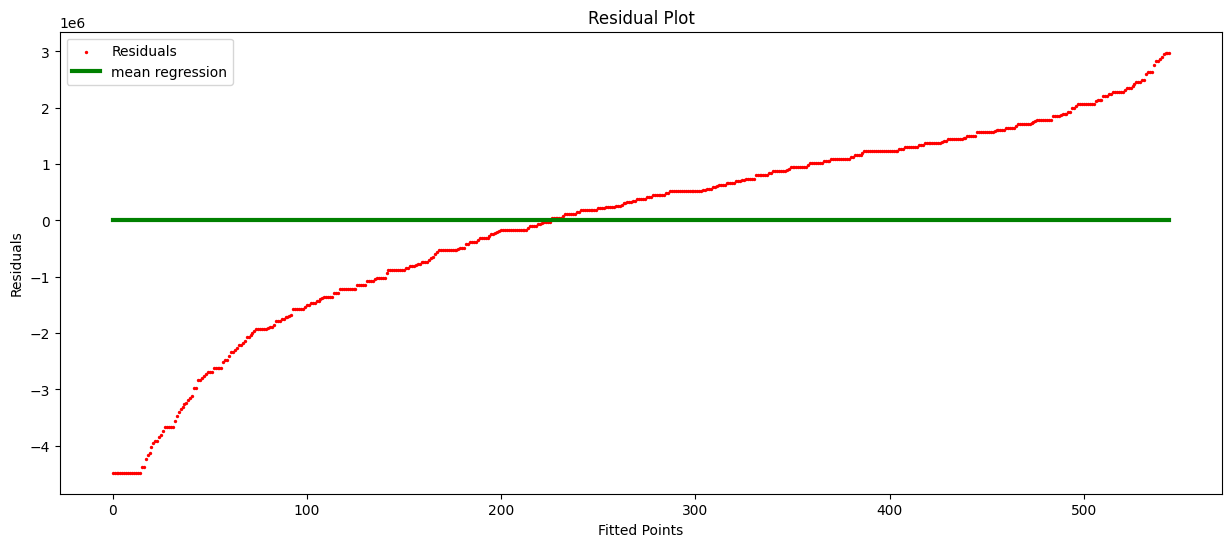

In [16]:
#Residual plot
k = range(0,len(data))
i = [0 for i in range (0,len(data))]
plt.figure(figsize = (15,6))

plt.scatter(k,mean_sales_difference,color='red',label='Residuals',s=2)
plt.plot(k,i,color='green',label = 'mean regression',linewidth=3)
plt.title('Residual Plot')
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

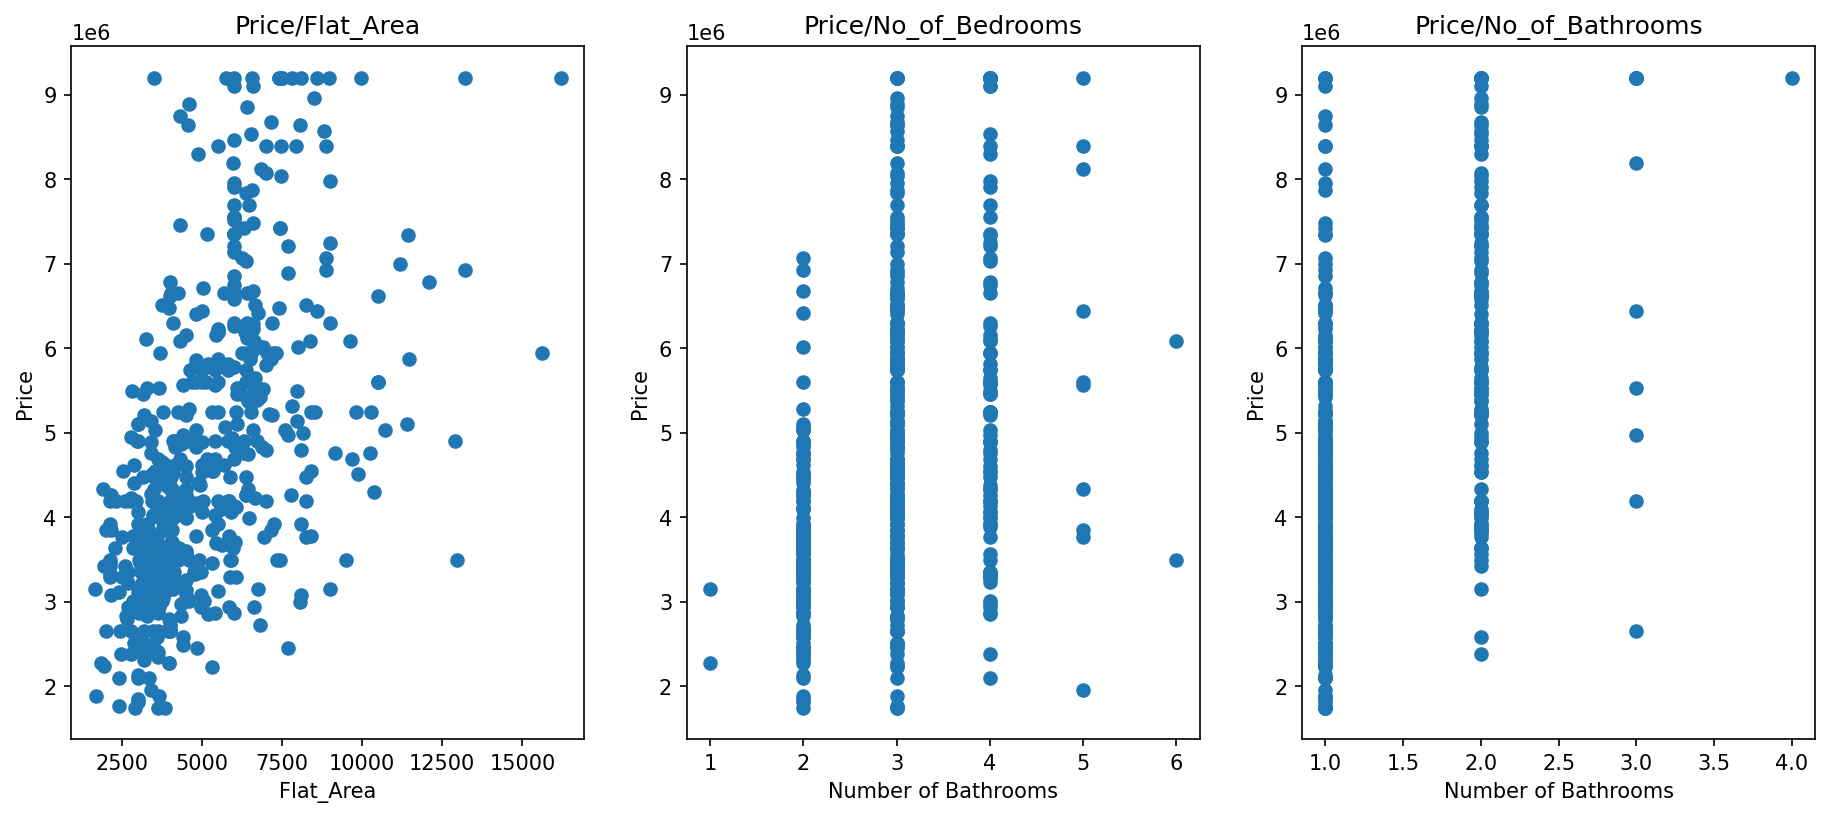

In [17]:
plt.figure(figsize = (15,6) ,dpi=150)
plt.subplot(1,3,1)
plt.scatter(data.Flat_Area,data.Price)
plt.xlabel("Flat_Area")
plt.ylabel("Price")
plt.title("Price/Flat_Area")

plt.subplot(1,3,2)
plt.scatter(data.No_of_Bedrooms,data.Price)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Price/No_of_Bedrooms")

plt.subplot(1,3,3)
plt.scatter(data.No_of_Bathrooms,data.Price)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Price/No_of_Bathrooms")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

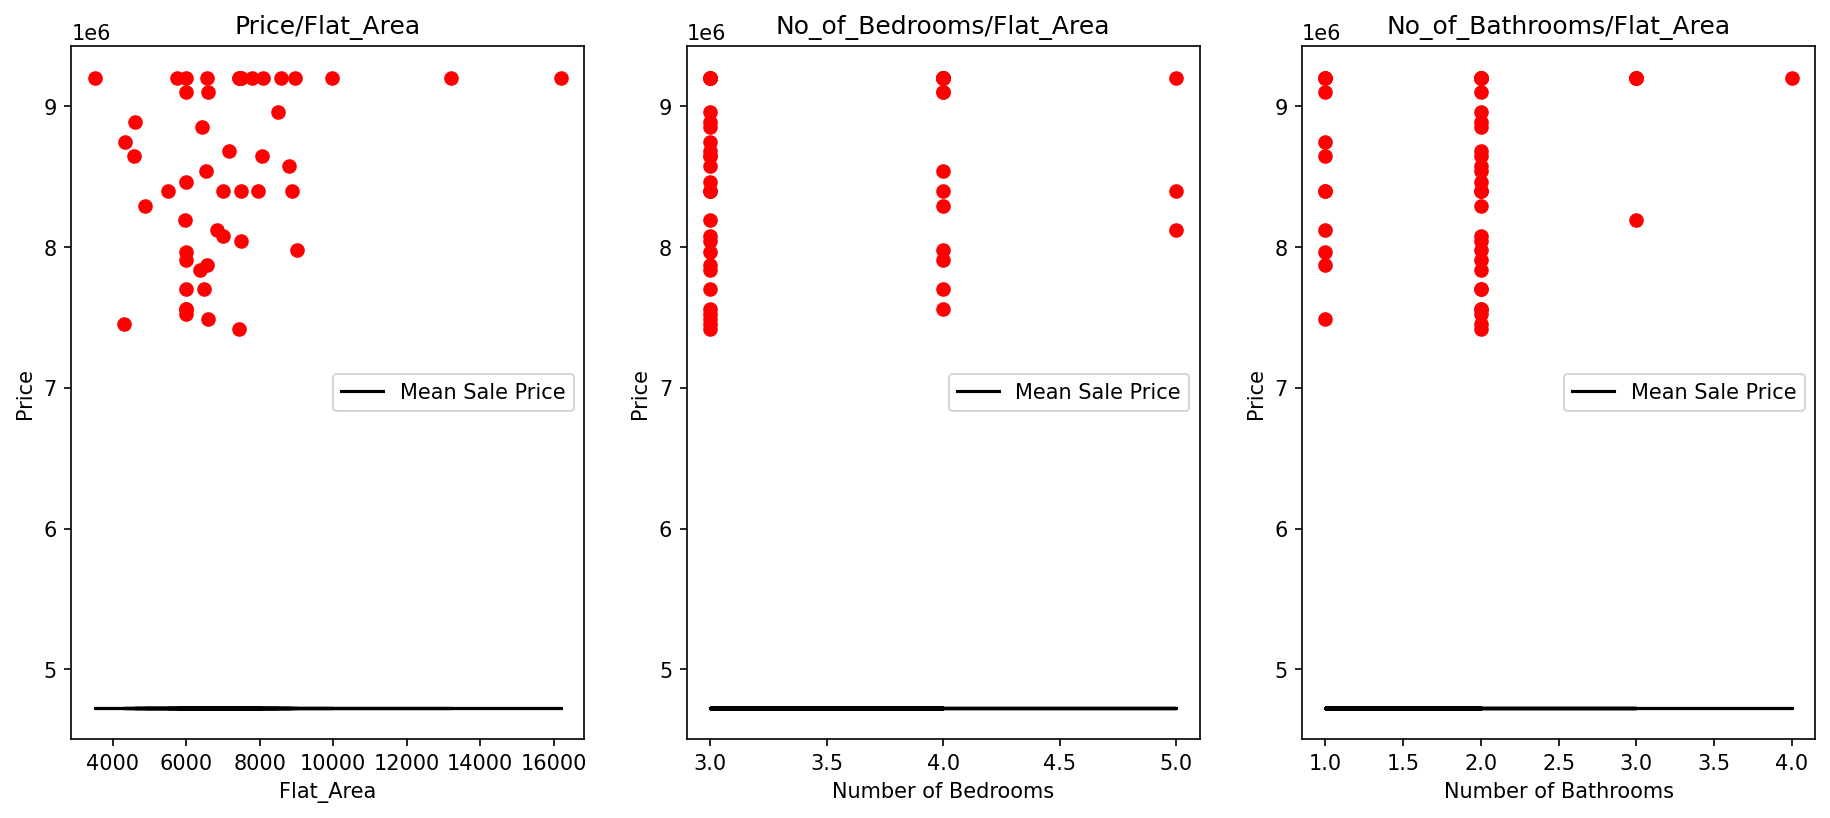

In [18]:
data['mean_sale_price'] = data.Price.mean()
new_data = data.head(50)
plt.figure(figsize = (15,6) ,dpi=150)

plt.subplot(1,3,1)
plt.scatter(new_data.Flat_Area,new_data.Price,color='red')
plt.plot(new_data.Flat_Area,new_data.mean_sale_price,color='black',label = 'Mean Sale Price')
plt.xlabel("Flat_Area")
plt.ylabel("Price")
plt.title("Price/Flat_Area")
plt.legend()

plt.subplot(1,3,2)
plt.scatter(new_data.No_of_Bedrooms,new_data.Price,color='red')
plt.plot(new_data.No_of_Bedrooms,new_data.mean_sale_price,color='black',label = 'Mean Sale Price')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("No_of_Bedrooms/Flat_Area")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(new_data.No_of_Bathrooms,new_data.Price,color='red')
plt.plot(new_data.No_of_Bathrooms,new_data.mean_sale_price,color='black',label = 'Mean Sale Price')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("No_of_Bathrooms/Flat_Area")
plt.legend()
plt.show

In [20]:
#Separating dependent and independent variables
X = data.drop(columns = ['Price','mean_sale_price'])
Y = data['Price']

In [21]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [22]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(scaled_X , Y , train_size = 0.80 ,random_state = 42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((436, 3), (109, 3), (436,), (109,))

In [23]:
#Implementing linear regression model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression()

In [24]:
classifier.intercept_

4706904.212787778

In [25]:
coeff = pd.DataFrame(classifier.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
No_of_Bedrooms,258801.538696
No_of_Bathrooms,649982.156676
Flat_Area,720887.448938


In [26]:
predicted_values = classifier.predict(x_test)
predicted_values

array([6243450.92920595, 6091973.41175576, 3628313.70011181,
       4298475.28439444, 3952685.90650615, 4870357.71705585,
       5468839.33263174, 5940885.22355369, 3362321.87096697,
       3533748.77560303, 8429287.0045559 , 3593069.78275012,
       3521916.96845388, 3666744.69017545, 3956010.80437046,
       6432491.17241338, 2950034.53579247, 4630965.07082549,
       4581091.60286084, 4279993.68151667, 4305125.08012307,
       4905269.14463111, 3498310.19361727, 3899487.54067718,
       5379067.09029536, 7242388.07280719, 3312448.40300231,
       4928259.15924708, 7024891.53312906, 3282524.32222352,
       5260748.94567813, 3673394.48590407, 5925728.51854023,
       4835446.28948059, 4574636.47175628, 5460242.81753676,
       4180773.89999785, 4044315.26239876, 3793090.80901925,
       5208410.22404609, 5289294.84795897, 3491992.88767508,
       6065374.22884127, 4032483.4552496 , 4529361.02133996,
       4241757.3560771 , 5925728.51854023, 4529750.35058809,
       4961597.74370032,

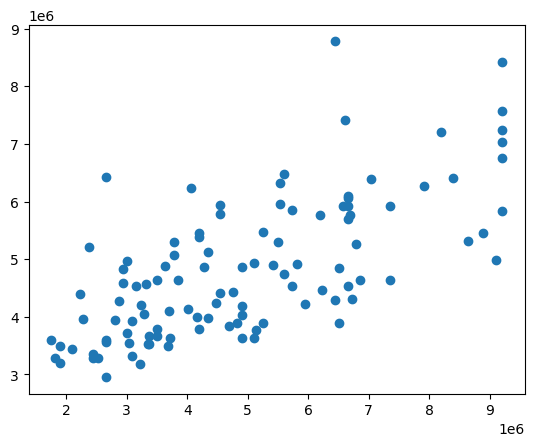

In [27]:
plt.scatter(y_test,predicted_values)

<Axes: xlabel='Price', ylabel='Density'>

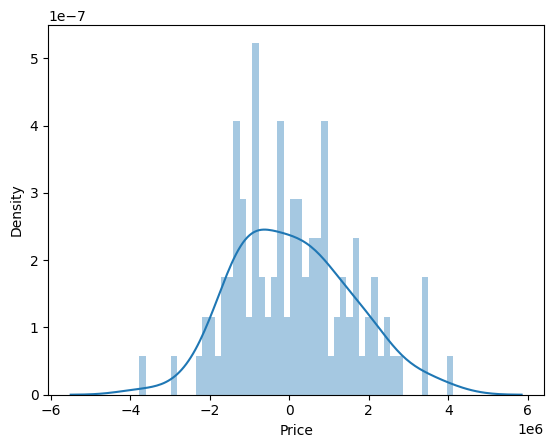

In [28]:
sns.distplot((y_test-predicted_values),bins=50)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,predicted_values)
mse

2158787510564.1812

In [30]:
r2 = r2_score(y_test,predicted_values)
r2

0.4656323544490666